In [39]:
%matplotlib widget

import os
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.analysis.fitter import Fitter
from onix.helpers import data_identifier, console_bold, present_float

In [2]:
data, headers = get_experiment_data(149)

In [36]:
resolution = 2e-6
voltages = data["quarto_voltages"]
length = len(voltages[0])
duration = resolution * length

discriminator_slope = 0.3 / 1e6  # Hz/V

In [87]:
no_background = (np.transpose(voltages) - np.average(voltages, axis=1)).transpose()
print(np.std(no_background) / discriminator_slope)

29860.52347698101


In [63]:
voltages_T = voltages / duration
voltages_f = np.fft.fft(voltages_T) * resolution
S_V = np.abs(voltages_f) ** 2
f_all = fftfreq(length, resolution)

f = f_all[f_all > 0]
W_V = 2 * S_V[:, f_all > 0]
W_V_avg = np.average(W_V, axis=0)

W_nu_avg = W_V_avg / discriminator_slope ** 2
W_phi_avg = W_nu_avg / f ** 2
W_phi_integral = np.cumsum(W_phi_avg[::-1] * (f[1] - f[0]))

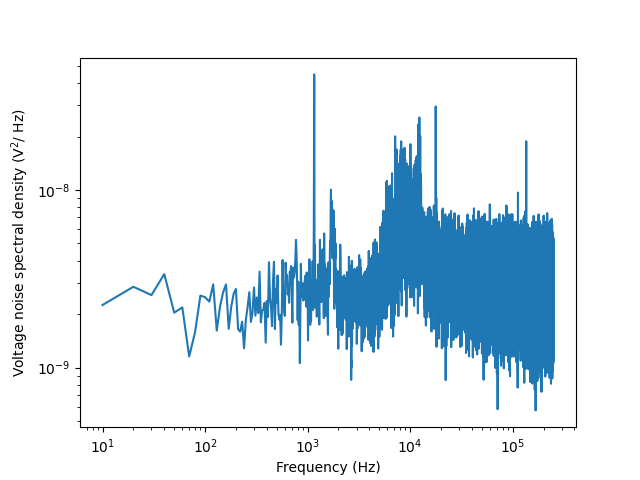

In [45]:
fig, ax = plt.subplots()
ax.plot(f, W_V_avg)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Voltage noise spectral density (V$^2$/ Hz)")
plt.show()

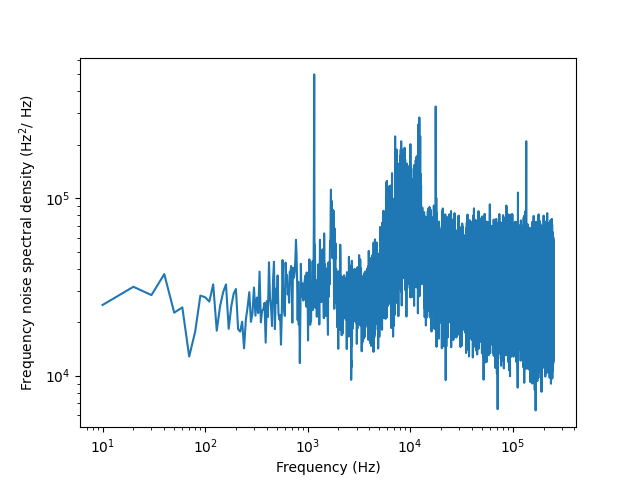

In [46]:
fig, ax = plt.subplots()
ax.plot(f, W_nu_avg)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Frequency noise spectral density (Hz$^2$/ Hz)")
plt.show()

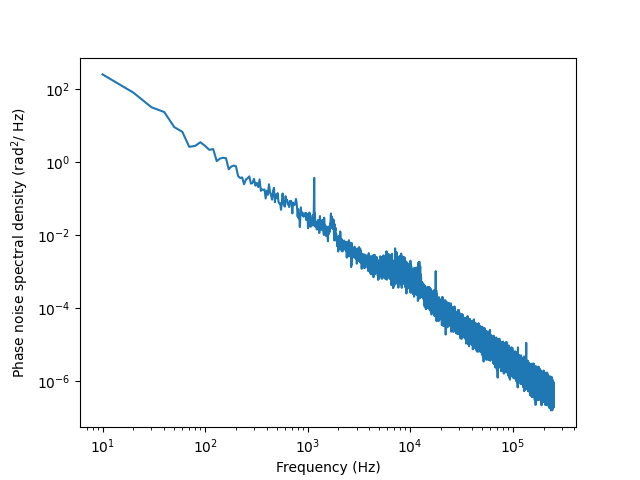

In [49]:
fig, ax = plt.subplots()
ax.plot(f, W_phi_avg)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Phase noise spectral density (rad$^2$/ Hz)")
plt.show()

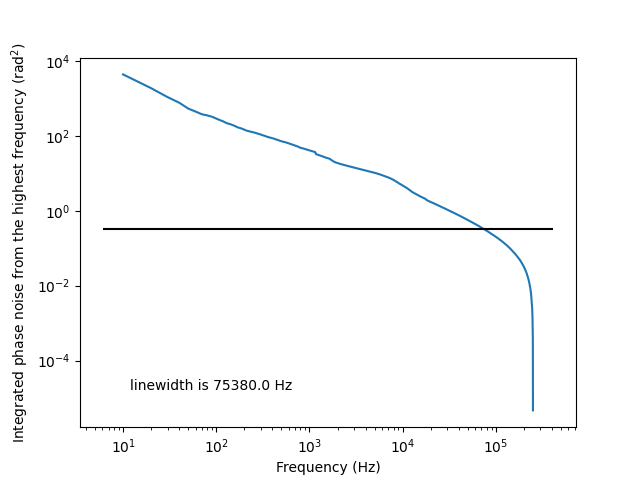

In [79]:
fig, ax = plt.subplots()
ax.plot(f[::-1], W_phi_integral)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Integrated phase noise from the highest frequency (rad$^2$)")
ax.xaxis.use_sticky_edges = True
ax.hlines(1 / np.pi, *ax.get_xlim(), color="k")

reverse_index = np.argmax(W_phi_integral > 1 / np.pi)
ax.text(0.1, 0.1, f"linewidth is {f[-reverse_index]} Hz", transform=ax.transAxes)
plt.show()

In [80]:
len(voltages_T)

10